# Point Labelling Facial Landmark Data
Modify landmark detection function to label certain points on the face

-----
# Vizualizing Edges

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

"""
CANNY EDGE DETECTION
f a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge.
If a pixel gradient value is below the lower threshold, then it is rejected.
threshold1: pixels below this value are rejected
threshold2: pixels above this value are accepted
"""
image = cv2.imread('face.jpg')
# Convert the image to grayscale and threshold it
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gaussianBlur_image = cv2.GaussianBlur(gray_image,(3,3),0)

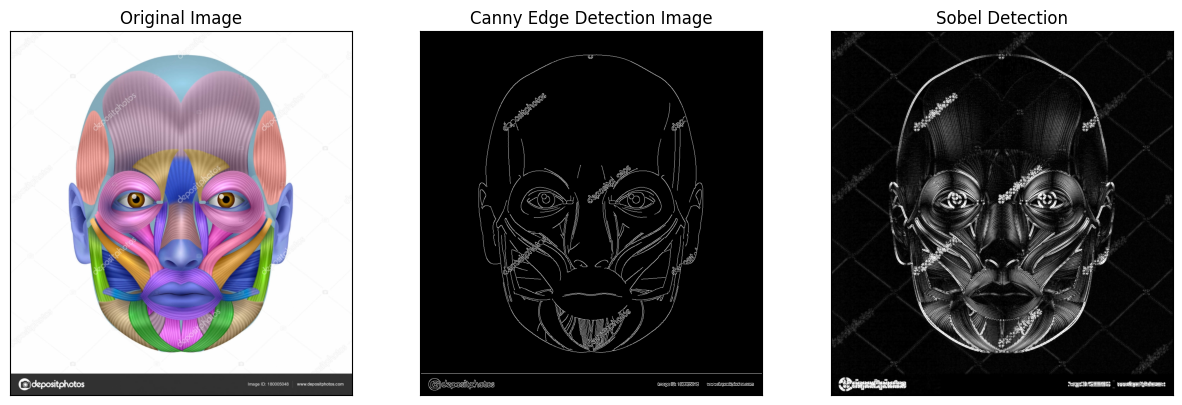

In [7]:
canny_image = cv2.Canny(image=gaussianBlur_image, threshold1=50, threshold2=150)
sobelxy_image = cv2.Sobel(src=gaussianBlur_image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
sobelxy_image = cv2.convertScaleAbs(sobelxy_image)

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,3,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(cv2.cvtColor(canny_image, cv2.COLOR_BGR2RGB))
plt.title('Canny Edge Detection Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(cv2.cvtColor(sobelxy_image, cv2.COLOR_BGR2RGB)) # Now using the converted image
plt.title('Sobel Detection'), plt.xticks([]), plt.yticks([])
plt.show()

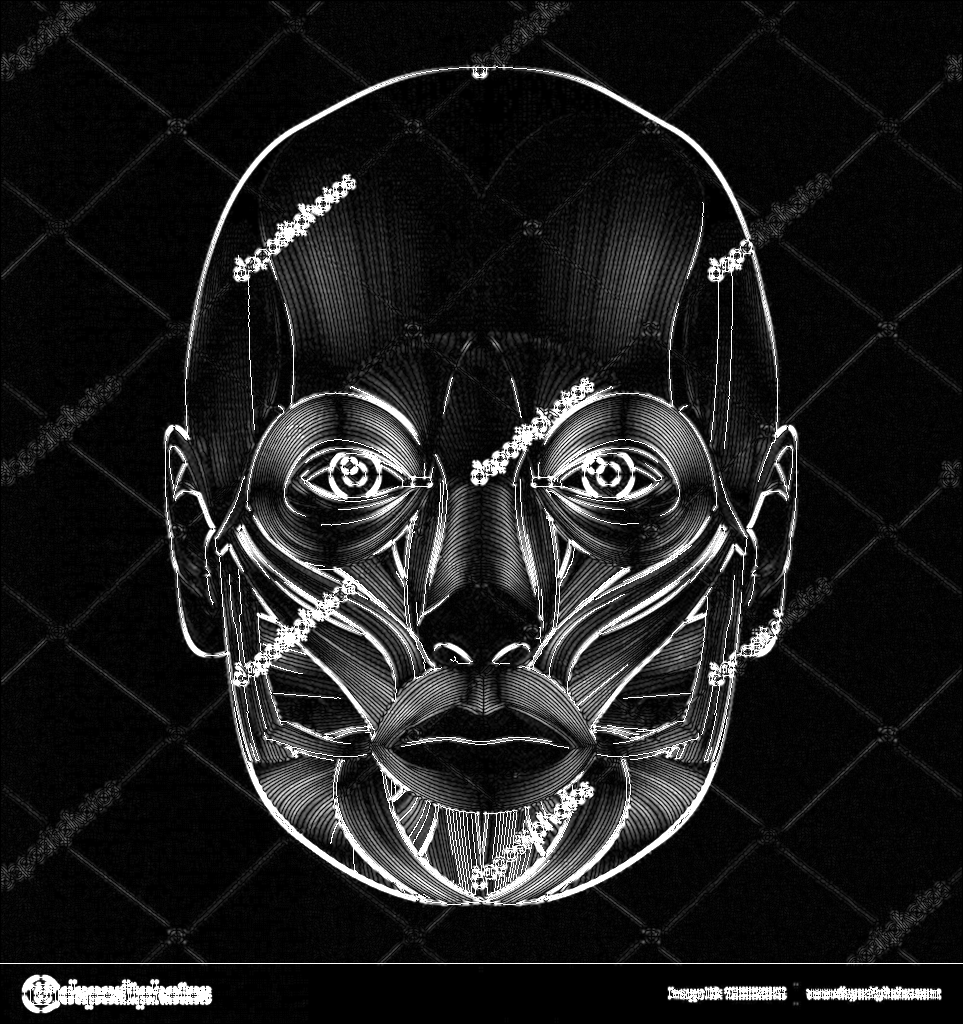

In [8]:
"""
Seeing what overlaying sobel and canny edge detection looks like
"""
alpha = 0.5
overlay = cv2.addWeighted(sobelxy_image, alpha, canny_image, 1 - alpha, 0)
overlay = cv2.add(canny_image, sobelxy_image)
cv2_imshow(overlay)

------
# Colour Segmentation using KMeans

In [9]:
"""
Vectorize the image for k-means. Flatten each pixel's RGB values into a single vector [R,G,B].
Reshape the image from a 2D array to a 1D array of vectors.
After clustering, apply centroid values to all pixels such that resulting image will have specified number of colours.
Reshape it back to the original image.
"""
Z = image.reshape((-1,3))
Z = np.float32(Z)

# Define k-means parameters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10
attempts = 10

ret, label, center = cv2.kmeans(Z, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

# Convert center to uint8 (color values) and reshape
center = np.uint8(center)
res = center[label.flatten()]

# This image has the segment colours
result_image = res.reshape((image.shape))


## Plot the Colour Regions

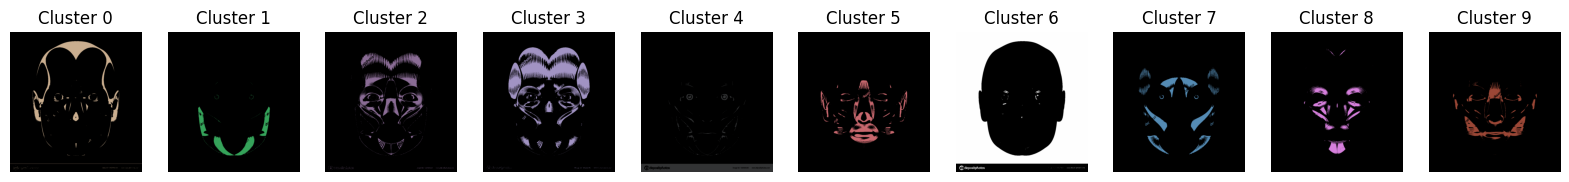

In [10]:
fig, axes = plt.subplots(1, K, figsize=(20, 10))
for i in range(K):
    mask = (label == i).reshape(result_image.shape[:2])  # Create a mask for cluster i
    isolated_img = np.zeros_like(result_image)  # Create an empty image to store this cluster's section
    isolated_img[mask] = result_image[mask]  # Apply the mask to isolate this cluster
    axes[i].imshow(cv2.cvtColor(isolated_img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'Cluster {i}')
    axes[i].axis('off')
plt.show()

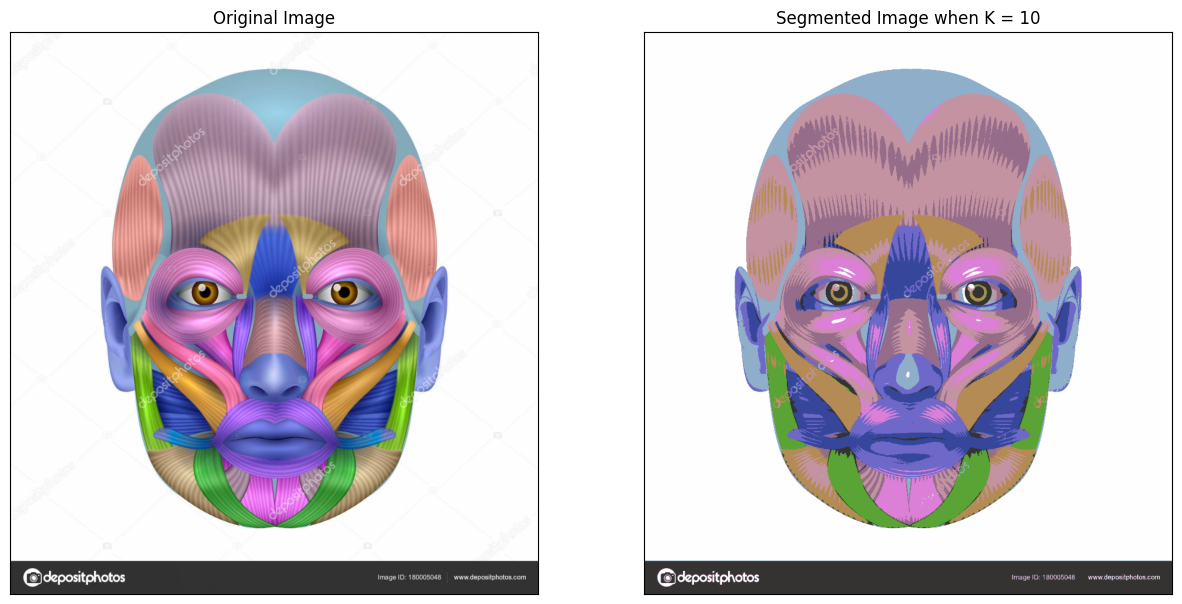

In [11]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()